In [ ]:
!pip install ultralytics

DETECÇÃO

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

#Link Documentação do YOLO: https://docs.ultralytics.com/pt/tasks/detect/#models
#Link Documentação do YOLO: https://www.ultralytics.com/pt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 110MB/s]


In [ ]:
results = model('https://ultralytics.com/images/bus.jpg')
#results = model('content/bus.jpg')

100%|██████████| 134k/134k [00:00<00:00, 7.76MB/s]


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 41.4ms
Speed: 12.8ms preprocess, 41.4ms inference, 740.4ms postprocess per image at shape (1, 3, 640, 480)


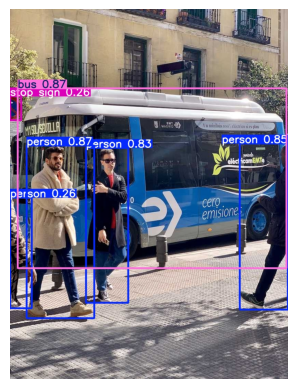

In [ ]:
for result in results:
    boxes = result.boxes
    result.save(filename='result.jpg')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = '/content/result.jpg'

image = mpimg.imread(img)
plt.imshow(image)
plt.axis('off')
plt.show()


SEGMENTAÇÃO

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')


100%|██████████| 6.74M/6.74M [00:00<00:00, 102MB/s]


In [ ]:
results = model('https://ultralytics.com/images/bus.jpg', save=True, save_txt=True, save_conf=True)


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 9.9ms
Speed: 3.2ms preprocess, 9.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict
1 label saved to runs/segment/predict/labels


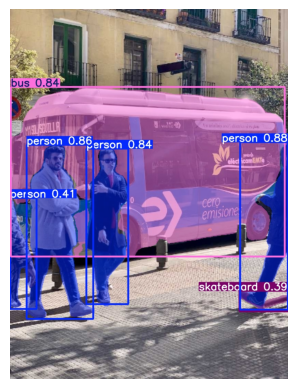

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = '/content/runs/segment/predict/bus.jpg'

image = mpimg.imread(img)
plt.imshow(image)
plt.axis('off')
plt.show()


KEY POINTS - POSE

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n-pose.pt')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.52M/6.52M [00:00<00:00, 200MB/s]


In [ ]:
results = model(['/content/foto1.png','/content/foto2.png','/content/foto3.png'], save=True, save_txt=True, save_conf=True, save_crop=True)


0: 640x640 1 person, 6.4ms
1: 640x640 1 person, 6.4ms
2: 640x640 1 person, 6.4ms
Speed: 3.8ms preprocess, 6.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/pose/predict
3 labels saved to runs/pose/predict/labels


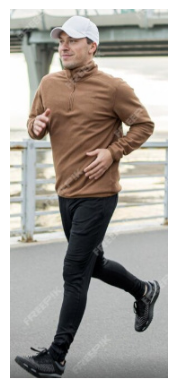

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = '/content/runs/pose/predict/crops/person/foto2.jpg'
#img = '/content/runs/pose/predict/foto2.jpg'

image = mpimg.imread(img)
plt.imshow(image)
plt.axis('off')
plt.show()

IMAGE CLASSIFICATION

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')

#https://deeplearning.cms.waikato.ac.nz/ -- exemplo de dataset

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.31M/5.31M [00:00<00:00, 37.2MB/s]


In [ ]:
results = model('https://ultralytics.com/images/bus.jpg', save=True, save_txt=True)


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 224x224 minibus 0.50, police_van 0.29, trolleybus 0.05, golfcart 0.02, jinrikisha 0.02, 3.7ms
Speed: 12.3ms preprocess, 3.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict
1 label saved to runs/classify/predict/labels


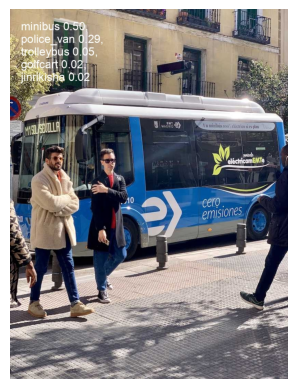

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = '/content/runs/classify/predict/bus.jpg'

image = mpimg.imread(img)
plt.imshow(image)
plt.axis('off')
plt.show()

TRACK - RASTREAMENTO DE OBJETOS

In [ ]:
from ultralytics import YOLO

model_detect = YOLO('yolov8n.pt')
model_segment = YOLO('yolov8n-seg.pt')
model_keypoints = YOLO('yolov8n-pose.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 113MB/s]


100%|██████████| 6.74M/6.74M [00:00<00:00, 100MB/s]


100%|██████████| 6.52M/6.52M [00:00<00:00, 102MB/s]


In [ ]:
#results = model_keypoints.track(source="/content/people.mp4", save=True)

results = model_segment.track(source="/content/people.mp4", save=True, stream=True)

results = model_detect.track(source="/content/people.mp4", save=True)

results = model_detect.track(source="/content/people.mp4", save=True, tracker="bytetrack.yaml")



CAIXA DELIMITADORA ORIENTADA


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n-obb.pt')


In [ ]:
results = model(source='plane.png', save=True, save_txt=True, save_conf=True, conf=0.9)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = '/content/runs/obb/predict/plane.png'
image = mpimg.imread(img)
plt.imshow(image)
plt.axis('off')
plt.show()


RASTREAMENTO COM DEEPSORT

In [ ]:
!pip install ikomia

Download video and cut example video

In [ ]:
import requests
import cv2

url = "https://www.pexels.com/download/video/12116094/?fps=29.97&h=720&w=1280"

# Define headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers, stream=True)
with open("video.mp4", "wb") as f:
    for chunk in response.iter_content(chunk_size=1024):
        f.write(chunk)

# Replace with the path to your downloaded video
video_path = "video.mp4"

# Open the video
cap = cv2.VideoCapture(video_path)

# Check if the video has opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count / fps
cut_frame = int(frame_count / 4)  # Frame to cut the video at

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('short_video.mp4', fourcc, fps, (int(cap.get(3)), int(cap.get(4))))

# Read and write frames until the cut point
frame_num = 0
while True:
    ret, frame = cap.read()
    if not ret or frame_num == cut_frame:
        break
    out.write(frame)
    frame_num += 1

# Release everything
cap.release()
out.release()

 Executar com YOLOv7 e DeepSORT

In [ ]:
from ikomia.dataprocess.workflow import Workflow
from ikomia.utils.displayIO import display
from google.colab.patches import cv2_imshow
import cv2


# Replace 'your_video_path.mp4' with the actual video file path
input_video_path = 'people.mp4'
output_video_path = 'deepsort_output_video.avi'

# Init your workflow
wf = Workflow()

# Add object detection algorithm
detector = wf.add_task(name="infer_yolo_v7", auto_connect=True)

# Add ByteTrack tracking algorithm
tracking = wf.add_task(name="infer_deepsort", auto_connect=True)

tracking.set_parameters({
    "categories": "all",
    "conf_thres": "0.5",
})

# Open the video file
stream = cv2.VideoCapture(input_video_path)
if not stream.isOpened():
    print("Error: Could not open video.")
    exit()

# Get video properties for the output
frame_width = int(stream.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(stream.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = stream.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
# The 'XVID' codec is widely supported and provides good quality
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (frame_width, frame_height))

while True:
    # Read image from stream
    ret, frame = stream.read()

    # Test if the video has ended or there is an error
    if not ret:
        print("Info: End of video or error.")
        break

    # Run the workflow on current frame
    wf.run_on(array=frame)

    # Get results
    image_out = tracking.get_output(0)
    obj_detect_out = tracking.get_output(1)

    # Convert the result to BGR color space for displaying
    img_out = image_out.get_image_with_graphics(obj_detect_out)
    img_res = cv2.cvtColor(img_out, cv2.COLOR_RGB2BGR)

    # Save the resulting frame
    out.write(img_out)

    # Display
    #display(img_res, title="DeepSORT", viewer="opencv")
    cv2_imshow(img_res)

    # Press 'q' to quit the video processing
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# After the loop release everything
stream.release()
out.release()
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

CAMERA - ACESSANDO PELO COLAB

Camera

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

NotAllowedError: Permission denied


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


<IPython.core.display.Javascript object>

Saved to photo.jpg


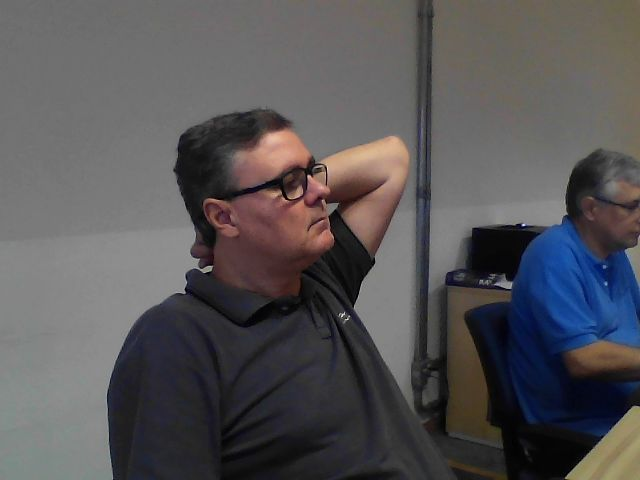

100%|██████████| 6.25M/6.25M [00:00<00:00, 279MB/s]



image 1/1 /content/photo.jpg: 480x640 2 persons, 1 chair, 37.3ms
Speed: 8.2ms preprocess, 37.3ms inference, 358.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

try:
    filename = take_photo()
    print("Saved to {}".format(filename))

    # Mostrar a imagem que acabou de ser capturada
    display(Image(filename))

    # Carregar o modelo YOLOv8
    model = YOLO("yolov8n.pt")

    # Processar a imagem com o modelo YOLOv8
    results = model(source=filename, save=True, save_txt=True, save_conf=True, save_crop=True)

except Exception as err:
    # Erros ocorrerão se o usuário não tiver webcam ou não conceder permissão de acesso
    print(str(err))


STREAM DE VIDEO

Instalação das bibliotecas

In [ ]:
pip install --upgrade --quiet ultralytics


In [ ]:
from base64 import b64decode, b64encode
from google.colab.output import eval_js
from IPython.display import display, Javascript
from PIL import Image
from ultralytics import YOLO
from ultralytics.engine.results import Results
import io
import numpy as np

MODEL_NAMES = [
    'yolov8n.pt',
    'yolov8s.pt',
    'yolov8m.pt',
    'yolov8l.pt',
    'yolov81.pt',
    'yolov8x.pt'
]

PRE_TRAINED_MODEL = YOLO(MODEL_NAMES[0])
IMG_SHAPE = [640, 480]
IMG_QUALITY = 0.8


Define javascript

In [ ]:
def start_stream():
    js = Javascript(f'''
    const IMG_SHAPE = {IMG_SHAPE};
    const IMG_QUALITY = {IMG_QUALITY};
    ''' + '''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
        stream.getVideoTracks()[0].stop();
        video.remove();
        div.remove();
        video = null;
        div = null;
        stream = null;
        imgElement = null;
        captureCanvas = null;
        labelElement = null;
    }

    function onAnimationFrame() {
        if (!shutdown) {
            window.requestAnimationFrame(onAnimationFrame);
        }
        if (pendingResolve) {
            var result = "";
            if (!shutdown) {
                captureCanvas.getContext('2d').drawImage(video, 0, 0, IMG_SHAPE[0], IMG_SHAPE[1]);
                result = captureCanvas.toDataURL('image/jpeg', IMG_QUALITY)
            }
            var lp = pendingResolve;
            pendingResolve = null;
            lp(result);
        }
    }

    async function createDom() {
        if (div !== null) {
            return stream;
        }

        div = document.createElement('div');
        div.style.border = '2px solid black';
        div.style.padding = '3px';
        div.style.width = '100%';
        div.style.maxWidth = '600px';
        document.body.appendChild(div);

        const modelOut = document.createElement('div');
        modelOut.innerHTML = "<span>Status: </span>";
        labelElement = document.createElement('span');
        labelElement.innerText = 'No data';
        labelElement.style.fontWeight = 'bold';
        modelOut.appendChild(labelElement);
        div.appendChild(modelOut);

        video = document.createElement('video');
        video.style.display = 'block';
        video.width = div.clientWidth - 6;
        video.setAttribute('playsinline', '');
        video.onclick = () => { shutdown = true; };
        stream = await navigator.mediaDevices.getUserMedia(
            {video: { facingMode: "environment"}});
        div.appendChild(video);

        imgElement = document.createElement('img');
        imgElement.style.position = 'absolute';
        imgElement.style.zIndex = 1;
        imgElement.onclick = () => { shutdown = true; };
        div.appendChild(imgElement);

        const instruction = document.createElement('div');
        instruction.innerHTML =
            '<span style="color: red; font-weight: bold;">' +
            'When finished, click here or on the video to stop this demo</span>';
        div.appendChild(instruction);
        instruction.onclick = () => { shutdown = true; };

        video.srcObject = stream;
        await video.play();

        captureCanvas = document.createElement('canvas');
        captureCanvas.width = IMG_SHAPE[0]; //video.videoWidth;
        captureCanvas.height = IMG_SHAPE[1]; //video.videoHeight;
        window.requestAnimationFrame(onAnimationFrame);

        return stream;
    }
    async function takePhoto(label, imgData) {
        if (shutdown) {
            removeDom();
            shutdown = false;
            return '';
        }

        var preCreate = Date.now();
        stream = await createDom();

        var preShow = Date.now();
        if (label != "") {
            labelElement.innerHTML = label;
        }

        if (imgData != "") {
            var videoRect = video.getClientRects()[0];
            imgElement.style.top = videoRect.top + "px";
            imgElement.style.left = videoRect.left + "px";
            imgElement.style.width = videoRect.width + "px";
            imgElement.style.height = videoRect.height + "px";
            imgElement.src = imgData;
        }

        var preCapture = Date.now();
        var result = await new Promise((resolve, reject) => pendingResolve = resolve);
        shutdown = false;

        return {
            'create': preShow - preCreate,
            'show': preCapture - preShow,
            'capture': Date.now() - preCapture,
            'img': result,
        };
    }
    ''')
    display(js)

def take_photo(label, img_data):
    data = eval_js(f'takePhoto("{label}", "{img_data}")')
    return data

Define funções em python

In [ ]:
def js_response_to_image(js_response) -> Image.Image:
    _, b64_str = js_response['img'].split(',')
    jpeg_bytes = b64decode(b64_str)
    image = Image.open(io.BytesIO(jpeg_bytes))
    return image

def turn_non_black_pixels_visible(rgba_compatible_array: np.ndarray) -> np.ndarray:
    rgba_compatible_array[:, :, 3] = (rgba_compatible_array.max(axis=2) > 0).astype(int) * 255
    return rgba_compatible_array

def black_transparent_rgba_canvas(w, h) -> np.ndarray:
    return np.zeros([w, h, 4], dtype=np.uint8)

def draw_annotations_on_transparent_bg(detection_result: Results) -> Image.Image:
    black_rgba_canvas = black_transparent_rgba_canvas(*detection_result.orig_shape)
    transparent_canvas_with_boxes_invisible = detection_result.plot(font='verdana', masks=False, img=black_rgba_canvas)
    transparent_canvas_with_boxes_visible = turn_non_black_pixels_visible(transparent_canvas_with_boxes_invisible)
    image = Image.fromarray(transparent_canvas_with_boxes_visible, 'RGBA')
    return image

Detecção em tempo real pela WebCan

In [ ]:
start_stream()
img_data = ''
while True:
    js_response = take_photo('Capturing...', img_data)
    if not js_response:
        break
    captured_img = js_response_to_image(js_response)
    for detection_result in PRE_TRAINED_MODEL(source=np.array(captured_img), verbose=False):
        annotations_img = draw_annotations_on_transparent_bg(detection_result)
        with io.BytesIO() as buffer:
            annotations_img.save(buffer, format='png')
            img_as_base64_str = str(b64encode(buffer.getvalue()), 'utf-8')
            img_data = f'data:image/png;base64,{img_as_base64_str}'

<IPython.core.display.Javascript object>

CALCULAR A AREA DA SEGMENTAÇÃO

In [ ]:
Repetir o código acima sobre SEGMENTAÇÃO

In [ ]:
import matplotlib.pyplot as plt
model = YOLO('yolov8n-seg.pt')
image = cv2.imread('/content/yolo.png')
results = model(image)
class_names = model.names

# Criar uma imagem em branco (preta) do mesmo tamanho da imagem original
masks_image = np.zeros_like(image)

for mask, cls in zip(masks, classes):
    mask = mask.cpu().numpy()

    # Calcular a área da máscara original
    binary_mask = (mask > 0.5).astype(np.uint8)
    area = np.sum(binary_mask)

    # Redimensionar a máscara binária para coincidir com as dimensões da imagem
    binary_mask_resized = cv2.resize(binary_mask, (image.shape[1], image.shape[0]))

    # Criar uma máscara colorida para melhor visualização
    colored_mask = np.zeros_like(image)
    color = np.random.randint(0, 255, (1, 3)).tolist()[0]  # Gera cor aleatória
    colored_mask[binary_mask_resized == 1] = color

    # Adicionar a máscara colorida na imagem de máscaras
    masks_image = cv2.addWeighted(masks_image, 1, colored_mask, 0.5, 0)

    class_name = class_names[int(cls)]
    print(f"A área do objeto segmentado ({class_name}) é: {area} pixels")

else:
    print("Nenhuma máscara encontrada nos resultados.")

# Converte a imagem de BGR para RGB
masks_image_rgb = cv2.cvtColor(masks_image, cv2.COLOR_BGR2RGB)

# Exibir a imagem com as máscaras usando matplotlib
plt.imshow(masks_image_rgb)
plt.axis('off')
plt.show()



EFEITO BLUR - DESFOCO DE IMAGENS

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from ultralytics.utils.plotting import Annotator, colors
